In [1]:
import numpy as np
import pandas as dp

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
#Dataset taken from https://www.kaggle.com/mchirico/montcoalert
df=dp.read_csv('911.csv')

In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 12 columns):
lat            99492 non-null float64
lng            99492 non-null float64
desc           99492 non-null object
zip            86637 non-null float64
title          99492 non-null object
timeStamp      99492 non-null datetime64[ns]
twp            99449 non-null object
addr           98973 non-null object
e              99492 non-null int64
Hour           99492 non-null int64
Month          99492 non-null int64
Day of week    99492 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 7.2+ MB


In [11]:
#top 5 zip
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [65]:
#** What are the top 5 townships (twp) for 911 calls? **
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [66]:
#What are the top 5 townships (twp) for 911 calls?
df['title'].nunique()

110

In [70]:
#** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 0

#**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

df['Reason']=df['title'].apply(lambda title: title.split(':')[0])

In [79]:
#What is the most common Reason for a 911 call based off of this new column?
df['Reason'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 13 columns):
lat            99492 non-null float64
lng            99492 non-null float64
desc           99492 non-null object
zip            86637 non-null float64
title          99492 non-null object
timeStamp      99492 non-null datetime64[ns]
twp            99449 non-null object
addr           98973 non-null object
e              99492 non-null int64
Hour           99492 non-null int64
Month          99492 non-null int64
Day of week    99492 non-null object
Reason         99492 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 7.6+ MB


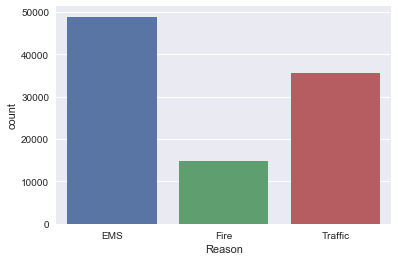

In [80]:
#Now use seaborn to create a countplot of 911 calls by Reason.
sns.countplot(x='Reason',data=df)

In [73]:

#** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **
type(df['timeStamp'].iloc[0])

pandas._libs.tslib.Timestamp

In [42]:
#Convert Str to Datetime
df['timeStamp']=dp.to_datetime(df['timeStamp'])

In [74]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslib.Timestamp

In [103]:
#You can now grab specific attributes from a Datetime object by calling them. For example:
#time=df['timeStamp'].iloc[0]


In [104]:
df['Hour']=df['timeStamp'].apply(lambda time :time.hour)
df['Month']=df['timeStamp'].apply(lambda time:time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [105]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Day of week,Reason,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,NaN,EMS,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,NaN,EMS,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17,12,NaN,Fire,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,17,12,NaN,EMS,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17,12,NaN,EMS,3


In [106]:
#Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:

dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

df['Day of Week']= df['Day of Week'].map(dmap)

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Month,Day of week,Reason,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,17,12,NaN,EMS,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,17,12,NaN,EMS,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,17,12,NaN,Fire,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,17,12,NaN,EMS,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,17,12,NaN,EMS,Thu


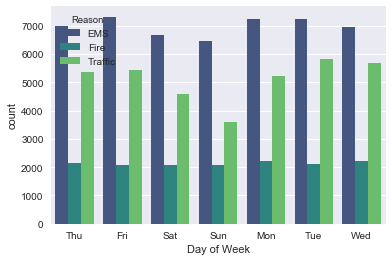

In [107]:
#Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.

sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')

In [112]:
df.drop(['Day of week'],axis=1,inplace=True)

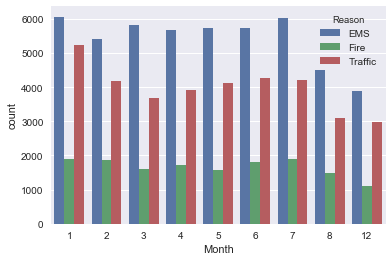

In [113]:
#Plot with Month ,but here few months are missing
sns.countplot(x='Month',data=df,hue='Reason')

In [116]:
bymonth=df.groupby('Month').count()
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Hour,Reason,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


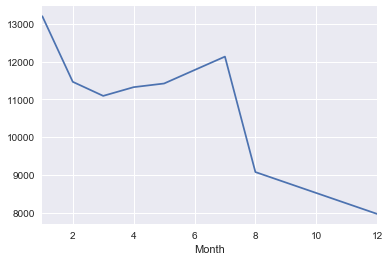

In [119]:
bymonth['twp'].plot()

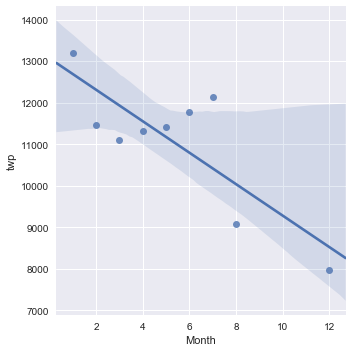

In [124]:
#Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.
sns.lmplot(x='Month',y='twp',data=bymonth.reset_index())

In [125]:
df['Date']=df['timeStamp'].apply(lambda t:t.date())

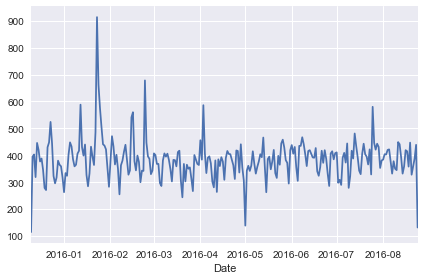

In [130]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call

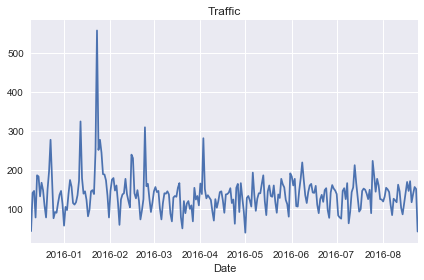

In [131]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an unstack method. Reference the solutions if you get stuck on this!

In [133]:
dayHour=df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


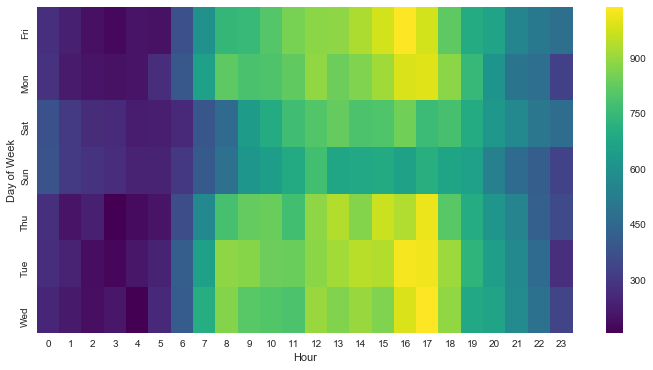

In [135]:
plt.figure(figsize=(12,6))

sns.heatmap(dayHour,cmap='viridis')

C:\Users\myself\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


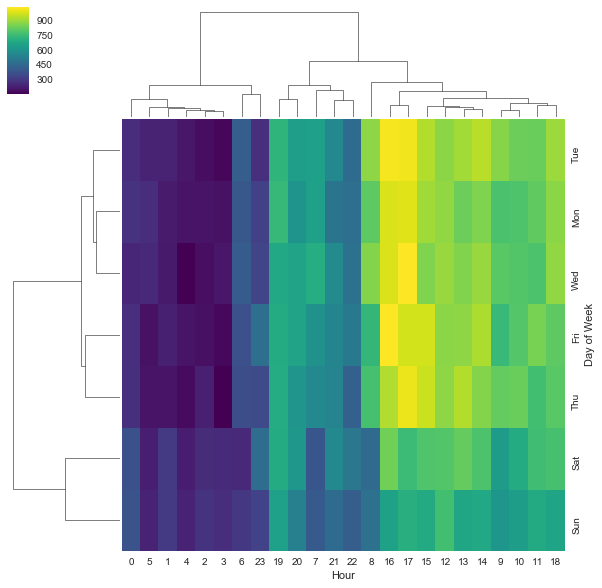

In [136]:
sns.clustermap(dayHour,cmap='viridis')

In [137]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
